Imports and read in csv files to work with

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('./dataset1.csv')
df2 = pd.read_csv('./dataset2.csv')

print(df1)
print(df2)

           start_time  bat_landing_to_food     habit  rat_period_start  \
0    30/12/2017 18:37            16.000000       rat  30/12/2017 18:35   
1    30/12/2017 19:51             0.074016      fast  30/12/2017 19:50   
2    30/12/2017 19:51             4.000000      fast  30/12/2017 19:50   
3    30/12/2017 19:52            10.000000       rat  30/12/2017 19:50   
4    30/12/2017 19:54            15.000000       rat  30/12/2017 19:50   
..                ...                  ...       ...               ...   
902    4/05/2018 4:18             2.000000       rat    4/05/2018 4:14   
903    4/05/2018 4:18             1.000000      fast    4/05/2018 4:14   
904    4/05/2018 4:19            22.000000      pick    4/05/2018 4:14   
905   3/05/2018 23:51             2.000000      fast   3/05/2018 23:46   
906    4/05/2018 5:39           120.000000  pick_rat    4/05/2018 5:37   

       rat_period_end  seconds_after_rat_arrival  risk  reward  month  \
0    30/12/2017 18:38                 

Format datetime for they are in a consistant format that is easy to work with pandas.

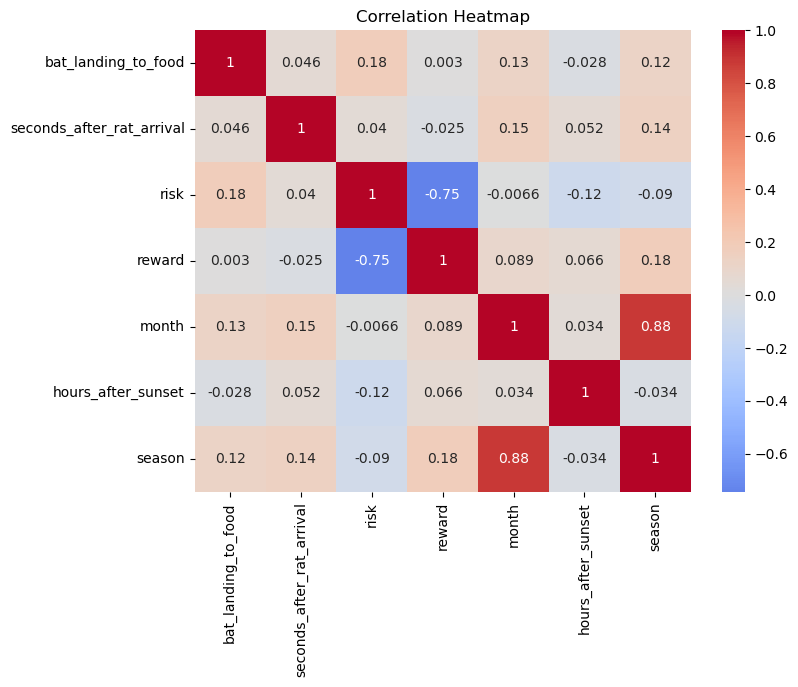

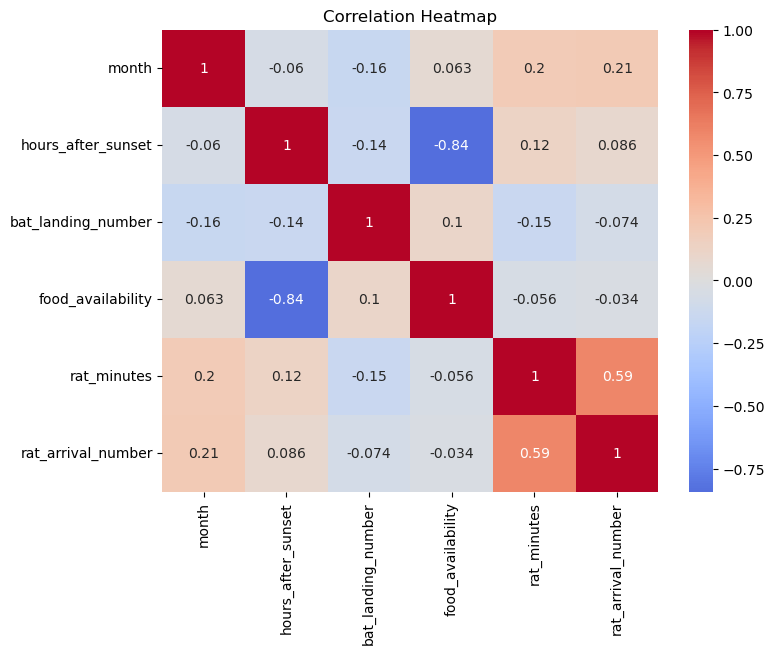

In [8]:
def format_datetimes(df, keys):
  for key in keys:
    df[key] = pd.to_datetime(df[key], dayfirst=True, errors="coerce")

def render_corr_heatmap(df):
  corr = df.corr(numeric_only=True)

  plt.figure(figsize=(8,6))
  sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
  plt.title("Correlation Heatmap")
  plt.show()

df1_datetime_keys = ["start_time", "rat_period_start", "rat_period_end", "sunset_time"]
df2_datetime_keys = ["time"]

format_datetimes(df1, df1_datetime_keys)
format_datetimes(df2, df2_datetime_keys)

render_corr_heatmap(df1)
render_corr_heatmap(df2)

# print(df1)
# print(df2)

Remove bat_landing_to_food that is less than 1 second.
This column is recorded in whole seconds with the exception
of some values the are consistently 0.0xxxx, these could be
record in minutes? in which case multiplying by 60 would give
us the seconds and the rows could be left in our set.

For further investigation most likely need a replacement as it removed 3/4 of our data.
maybe find a correlation with another column and we can test the recorded in minutes
theory, if not we can populate it if we can find a strong enough correlation.

In [5]:
df1 = df1[df1["bat_landing_to_food"] >= 1]

print(df1)

             start_time  bat_landing_to_food     habit    rat_period_start  \
0   2017-12-30 18:37:00                 16.0       rat 2017-12-30 18:35:00   
2   2017-12-30 19:51:00                  4.0      fast 2017-12-30 19:50:00   
3   2017-12-30 19:52:00                 10.0       rat 2017-12-30 19:50:00   
4   2017-12-30 19:54:00                 15.0       rat 2017-12-30 19:50:00   
5   2017-12-30 19:54:00                 24.0       rat 2017-12-30 19:50:00   
..                  ...                  ...       ...                 ...   
902 2018-05-04 04:18:00                  2.0       rat 2018-05-04 04:14:00   
903 2018-05-04 04:18:00                  1.0      fast 2018-05-04 04:14:00   
904 2018-05-04 04:19:00                 22.0      pick 2018-05-04 04:14:00   
905 2018-05-03 23:51:00                  2.0      fast 2018-05-03 23:46:00   
906 2018-05-04 05:39:00                120.0  pick_rat 2018-05-04 05:37:00   

         rat_period_end  seconds_after_rat_arrival  risk  rewar

In [6]:
import re

unique_categories = df1["habit"].unique()
cleaned_categories = [category for category in unique_categories if isinstance(category, str) and re.fullmatch(r"[a-z_]+", category)]

df1 = df1[df1["habit"].isin(cleaned_categories)]

print(df1)

             start_time  bat_landing_to_food     habit    rat_period_start  \
0   2017-12-30 18:37:00                 16.0       rat 2017-12-30 18:35:00   
2   2017-12-30 19:51:00                  4.0      fast 2017-12-30 19:50:00   
3   2017-12-30 19:52:00                 10.0       rat 2017-12-30 19:50:00   
4   2017-12-30 19:54:00                 15.0       rat 2017-12-30 19:50:00   
5   2017-12-30 19:54:00                 24.0       rat 2017-12-30 19:50:00   
..                  ...                  ...       ...                 ...   
902 2018-05-04 04:18:00                  2.0       rat 2018-05-04 04:14:00   
903 2018-05-04 04:18:00                  1.0      fast 2018-05-04 04:14:00   
904 2018-05-04 04:19:00                 22.0      pick 2018-05-04 04:14:00   
905 2018-05-03 23:51:00                  2.0      fast 2018-05-03 23:46:00   
906 2018-05-04 05:39:00                120.0  pick_rat 2018-05-04 05:37:00   

         rat_period_end  seconds_after_rat_arrival  risk  rewar

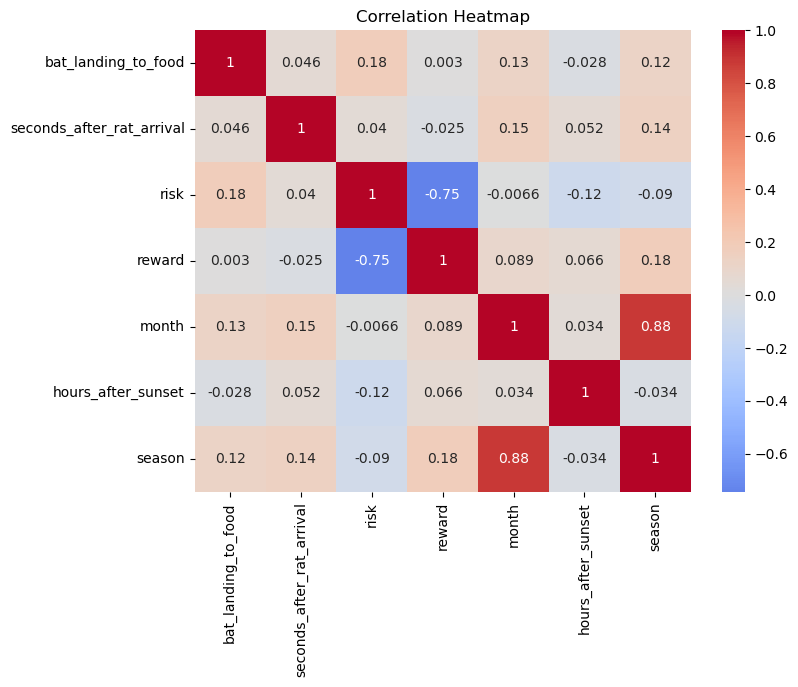

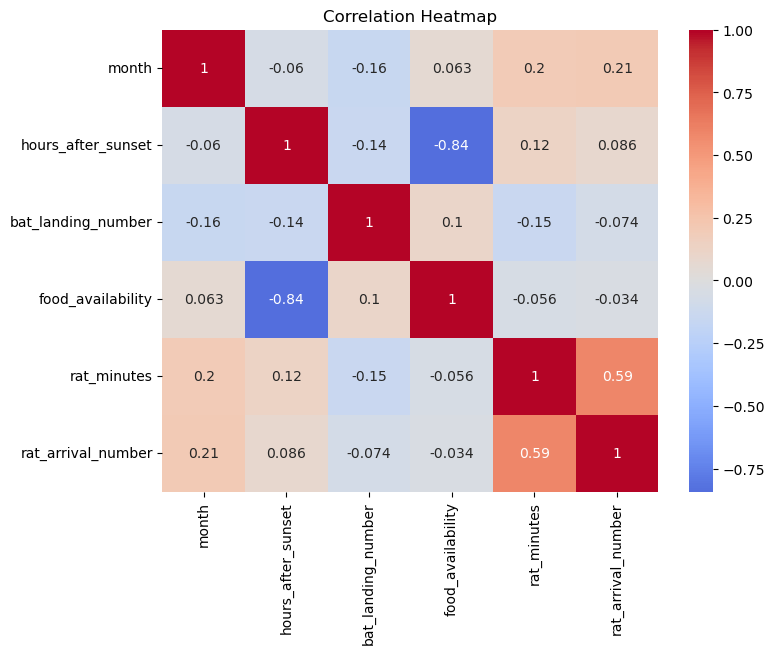

In [9]:
render_corr_heatmap(df1)
render_corr_heatmap(df2)